In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
# shape of the X_test
X_test.shape

(10000, 32, 32, 3)

In [5]:
# shape of the X_train
X_train.shape

(50000, 32, 32, 3)

In [6]:
# shape of the y_train
y_train.shape

(50000, 1)

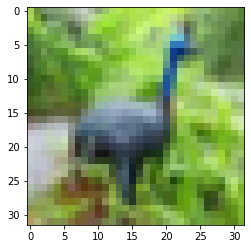

In [7]:
# display one of the images
plt.imshow(X_train[6])

In [8]:
# Redefine datatype and rescale, the train and test dataset
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [9]:
# load categorization dataset
from keras.utils.np_utils import to_categorical

In [10]:
# Convert the y_train and y_test to categorical features
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [11]:
# print the shape of y_train
y_train_cat.shape

(50000, 10)

In [12]:
# print the shape of y_test
y_test_cat.shape

(10000, 10)

In [13]:
# print the value X_train
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [14]:
# Load libraries for deep learning modelling
from keras.models import Sequential
from keras.layers import Flatten, Activation
from keras.layers import MaxPool2D, AvgPool2D, Conv2D
from keras.layers import Dense
import keras.backend as K

In [15]:
# clear session
K.clear_session()
# define model architecture
model = Sequential()
model.add(Conv2D(32, (4, 4), input_shape = (32, 32, 3), ))
model.add(Conv2D(64, (4, 4), ))
model.add(MaxPool2D(pool_size = (3, 3)))
model.add(Conv2D(32, (3, 3), )) 
model.add(Conv2D(16, (3, 3), )) 
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        32832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [21]:
# train model
model.fit(X_train, y_train_cat, batch_size=64,
          epochs=20, verbose=1, validation_split=0.3)

Epoch 1/20
547/547 [==============================] - 4s 8ms/step - loss: 0.6419 - accuracy: 0.7723 - val_loss: 1.4603 - val_accuracy: 0.5981
Epoch 2/20
547/547 [==============================] - 4s 7ms/step - loss: 0.6390 - accuracy: 0.7725 - val_loss: 1.3570 - val_accuracy: 0.6131
Epoch 3/20
547/547 [==============================] - 4s 7ms/step - loss: 0.6358 - accuracy: 0.7775 - val_loss: 1.3586 - val_accuracy: 0.6115
Epoch 4/20
547/547 [==============================] - 4s 7ms/step - loss: 0.6286 - accuracy: 0.7772 - val_loss: 1.3406 - val_accuracy: 0.6154
Epoch 5/20
547/547 [==============================] - 4s 7ms/step - loss: 0.6248 - accuracy: 0.7785 - val_loss: 1.3758 - val_accuracy: 0.6196
Epoch 6/20
547/547 [==============================] - 4s 7ms/step - loss: 0.6134 - accuracy: 0.7808 - val_loss: 1.4168 - val_accuracy: 0.6028
Epoch 7/20
547/547 [==============================] - 4s 7ms/step - loss: 0.6054 - accuracy: 0.7855 - val_loss: 1.4098 - val_accuracy: 0.6050
Epoch 

In [22]:
# evaluate model performance
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 1.5116 - accuracy: 0.6134


[1.511579155921936, 0.6133999824523926]